In [167]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)

In [129]:
NUM_OF_CANDIDATES = 10
candidates = random.sample(range(NUM_OF_CANDIDATES), NUM_OF_CANDIDATES)
candidates  # ranks

[0, 5, 7, 8, 6, 4, 9, 2, 3, 1]

In [148]:
NUM_OF_TRIALS = 900
START_ACCEPT = 6 # not index. adjusted in code
index = START_ACCEPT - 1

SUCCESS_CNT = 0

for i in range(NUM_OF_TRIALS):
    candidates = random.sample(range(NUM_OF_CANDIDATES), NUM_OF_CANDIDATES)  # new lineup everytime
    selected_candidate_rank = None
    
    prev_candidates = candidates[:index]
    remaining_candidates = candidates[index+1:]
    best_thus_far = max(prev_candidates)
    
    for candidate_rank in remaining_candidates:
        if candidate_rank > best_thus_far:
            selected_candidate_rank = candidate_rank  # found better than best we've seen so far! settle
            
    # If None, then we have not found better than our best_thus_far
    if selected_candidate_rank is not None:
        is_best = all(selected_candidate_rank >= rank for rank in candidates)
        if is_best:
            SUCCESS_CNT += 1

print(f"Picked best candidate {SUCCESS_CNT} out of {NUM_OF_TRIALS}; {(SUCCESS_CNT/NUM_OF_TRIALS)*100:.2f}%")

Picked best candidate 2838 out of 9000; 31.53%


Let's make into a function:

In [178]:
def probability_of_optimally_stopping(start_accept):
    SUCCESS_CNT = 0
    
    for i in range(NUM_OF_TRIALS):
        candidates = random.sample(range(NUM_OF_CANDIDATES), NUM_OF_CANDIDATES)  # new lineup everytime
        selected_candidate_rank = None

        prev_candidates = candidates[:start_accept-1]
        remaining_candidates = candidates[start_accept:]
        best_thus_far = max(prev_candidates)

        for candidate_rank in remaining_candidates:
            if candidate_rank > best_thus_far:
                selected_candidate_rank = candidate_rank  # found better than best we've seen so far! settle

        # If None, then we have not found better than our best_thus_far
        if selected_candidate_rank is not None:
            is_best = all(selected_candidate_rank >= rank for rank in candidates)
            if is_best:
                SUCCESS_CNT += 1
                
    return round((SUCCESS_CNT/NUM_OF_TRIALS), 3)

In [183]:
probability_of_optimally_stopping(4)

0.306

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

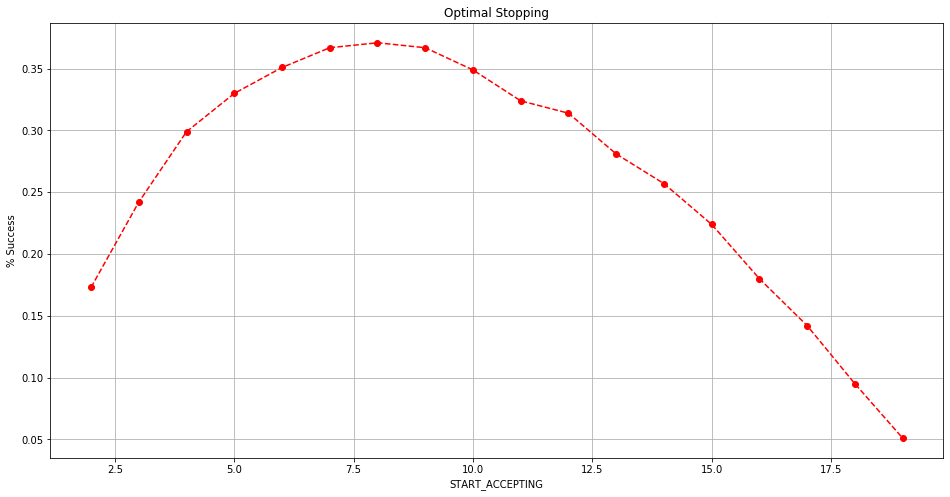

In [177]:
NUM_OF_CANDIDATES = 20
NUM_OF_TRIALS = 10000

xpoints = range(2, NUM_OF_CANDIDATES)                 
ypoints = [probability_of_optimally_stopping(x) for x in xpoints]

plt.plot(xpoints, ypoints, 'ro', linestyle='--')

plt.title("Optimal Stopping")
plt.xlabel('START_ACCEPTING')     #set the label of the x-axis
plt.ylabel('% Success')
plt.grid()


# The answer is *e<sup>-1</sup>* ≈ 0.3678

## References
- [numberphile video](https://www.youtube.com/watch?v=XIOoCKO-ybQ&t=0s&ab_channel=Numberphile2)